**Import Libraries**

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import tensorflow 

**Import Data**

In [2]:
data=pd.read_csv('BTC-USD Training Data - 1st Jan 2016 to 1st Jan 2022.csv')

**Data preprocessing**

In [3]:
training_set = data.iloc[:, 1:2].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 2193):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

**Model Building**

In [ ]:
# Part 2 - Building the RNN
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=[tensorflow.keras.metrics.Accuracy()])

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
67/67 [==============================] - 18s 144ms/step - loss: 0.0106 - accuracy: 0.0000e+00
Epoch 2/100
67/67 [==============================] - 11s 158ms/step - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 3/100
67/67 [==============================] - 10s 149ms/step - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 4/100
67/67 [==============================] - 10s 143ms/step - loss: 0.0032 - accuracy: 0.0000e+00
Epoch 5/100
67/67 [==============================] - 9s 141ms/step - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 6/100
67/67 [==============================] - 10s 145ms/step - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 7/100
67/67 [==============================] - 10s 146ms/step - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 8/100
67/67 [==============================] - 10s 152ms/step - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 9/100
67/67 [==============================] - 11s 164ms/step - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 10/100
67/67 [===========================

**Import Test Data**

In [9]:
# Part 3 - Making the predictions and visualising the results

dataset_test = pd.read_csv('BTC-USD Out of Time Testing 1st Jan 2022 to 4th Feb 2022.csv')
real_price = dataset_test.iloc[:, 1:2].values


**Prediction and Result visualisation**

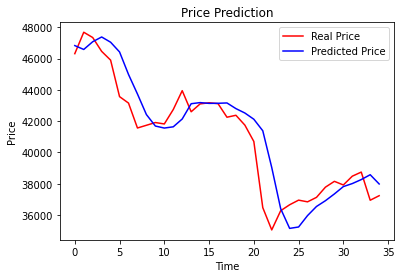

In [10]:
# Getting the predicted price 
dataset_total = pd.concat((data['Open'], dataset_test['Open']), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 95):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_price = regressor.predict(X_test)
predicted_price = sc.inverse_transform(predicted_price)

# Visualising the results
plt.plot(real_price, color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

**Model Performance**

In [7]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_price, predicted_price))

In [14]:
rmse

1515.6520863841931